In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from scipy import sparse
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
table = pd.read_csv("train.csv")
table.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [47]:
finalLearningMatrix = pd.get_dummies(table, columns = ["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years",
                                                                    "Marital_Status","Product_Category_1","Product_Category_2",
                                                                    "Product_Category_3"],sparse = True)

In [48]:
#splits into training and tests
#train, test = train_test_split(finalLearningMatrix, test_size = .3)

In [49]:
#checks if train and test have proper amount of values
print(len(train),len(test))

385047 165021


In [50]:
#split labels from dataset

table_purchase = table["Purchase"]


# train_labels = train["Purchase"]
# test_labels = test["Purchase"]
# trainDrop = train.drop(columns =["Purchase","Product_ID"])
# testDrop = test.drop(columns =["Purchase","Product_ID"])

In [51]:
train, test, train_labels, test_labels = train_test_split(finalLearningMatrix, table_purchase, test_size = .3)

In [52]:
train = train.drop(columns =["Purchase","Product_ID"])
test = test.drop(columns =["Purchase","Product_ID"])

In [53]:
lm = linear_model.LinearRegression()

In [54]:
model = lm.fit(train,train_labels)
predictions = lm.predict(test)

In [55]:
predictions_train = lm.predict(train)

In [56]:
predictions[0]

14617.52188433107

In [57]:
model.score(train,train_labels)

0.6476413941837744

In [58]:
model.score(test,test_labels)

0.648418851936174

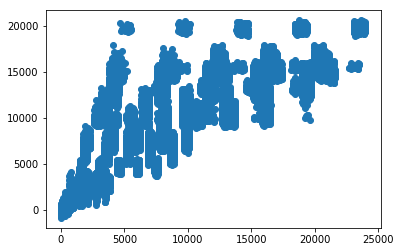

In [59]:
plt.scatter(test_labels,predictions)

In [60]:
predictions

array([14617.52188433,  6380.85584785,  7541.87105829, ...,
       13190.74596067, 12886.38351794, 13439.68231349])

In [61]:
reg = LinearRegression().fit(train, train_labels)

In [62]:
reg.score(train, train_labels)

0.6476413941837744

In [63]:
reg2 = LinearRegression().fit(train, train_labels)

In [64]:
predictions = reg2.predict(test)

In [65]:
mean_squared_error(predictions, test_labels)

8902442.176206078

In [66]:
mean_squared_error(predictions_train, train_labels)

8876796.680380695

In [67]:
np.mean((lm.predict(test)-test_labels)**2)

8902442.176206078

In [68]:
from sklearn.naive_bayes import GaussianNB
modelG = GaussianNB()
modelG.fit(trainDrop, train_labels)
predictedG = modelG.predict(testDrop)
expectedG = test_labels

# Import  metrics
from sklearn import metrics

# summarize the fit of the model

print(metrics.accuracy_score(expectedG, predictedG))
print(metrics.classification_report(expectedG, predictedG))
print(metrics.confusion_matrix(expectedG, predictedG))


NameError: name 'trainDrop' is not defined

In [ ]:
#dropping product category 2 and 3

In [ ]:
table2 = pd.read_csv("train.csv")
table2 = table2.drop(columns =["Product_Category_2","Product_Category_3"])
noNull = pd.get_dummies(table2, columns = ["Gender","Age","Occupation","City_Category",
                                          "Stay_In_Current_City_Years","Marital_Status",
                                          "Product_Category_1"],sparse = True)
table_purchase2 = noNull["Purchase"]
train2, test2, train_labels2, test_labels2 = train_test_split(noNull, table_purchase2, test_size = .3)
train2 = train2.drop(columns =["Purchase","Product_ID"])
test2 = test2.drop(columns =["Purchase","Product_ID"])
            

In [ ]:
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(train2,train_labels2)
predictions2 = lm2.predict(test2)
model2.score(test2,test_labels2)

In [ ]:
plt.scatter(test_labels2,predictions2)

In [ ]:
mean_squared_error(predictions2, test_labels2)

In [ ]:
reg2 = LinearRegression().fit(train2, train_labels2)
reg2.score(train2, train_labels2)

In [ ]:
table3 = pd.read_csv("train.csv")
table3 = table3.drop(columns =["Product_Category_2","Product_Category_3"])
noNullID = pd.get_dummies(table3, columns = ["Gender","Age","Occupation","City_Category",
                                          "Stay_In_Current_City_Years","Marital_Status",
                                          "Product_Category_1","Product_ID"],sparse = True)
table_purchase3 = noNullID["Purchase"]
train3, test3, train_labels3, test_labels3 = train_test_split(noNullID, table_purchase3, test_size = .3)
train3 = train3.drop(columns =["Purchase"])
test3 = test3.drop(columns =["Purchase"])
            

In [ ]:
# lm3 = linear_model.LinearRegression()
# model3 = lm3.fit(train3,train_labels3)
# predictions3 = lm3.predict(test3)
# model3.score(test3,test_labels3)

In [ ]:
# plt.scatter(test_labels3,predictions3)

In [ ]:
train3.head()

In [ ]:
type(train3)

In [ ]:
import scipy
sparseTrain = scipy.sparse.csr_matrix(train3.values)
sparseTest = scipy.sparse.csr_matrix(test3.values)

In [ ]:
reg3 = linear_model.LinearRegression()

In [ ]:
model2 = lm2.fit(sparseTrain,train_labels3)
predictions2 = lm2.predict(sparseTest)
model2.score(sparseTest,test_labels3)

In [ ]:
mean_squared_error(predictions2, test_labels3)

In [ ]:
model2.score(sparseTrain, train_labels3)

In [ ]:
clf = GaussianNB()
# clf.fit(X, Y)
# GaussianNB(priors=None, var_smoothing=1e-09)
# >>> print(clf.predict([[-0.8, -1]]))
# [1]
# >>> clf_pf = GaussianNB()
# >>> clf_pf.partial_fit(X, Y, np.unique(Y))
# GaussianNB(priors=None, var_smoothing=1e-09)
# >>> print(clf_pf.predict([[-0.8, -1]]))
# [1]

In [ ]:
clf.fit(sparseTrain, train_labels3)

In [ ]:
from sklearn import tree

In [ ]:
 # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
Decision_Model = tree.DecisionTreeRegressor()
# Train the model using the training sets and check score
Decision_Model.fit(sparseTrain, train_labels3)
Decision_Model.score(X, y)
# #Predict Output
# predicted= model.predict(x_test)

In [ ]:
Decision_Model.score(sparseTrain,train_labels3)

In [ ]:
predicted_Decision = Decision_Model.predict(sparseTest)

In [ ]:
Decision_Model.score(sparseTest,test_labels3)

In [ ]:
mean_squared_error(predicted_Decision, test_labels3)

In [ ]:
type(test_labels3)

In [ ]:
test_labels.std()

In [ ]:
predictedDecision2 = Decision_Model.predict(sparseTrain)

In [ ]:
mean_squared_error(predictedDecision2, train_labels3)

# This is the test of OLS Regression with User_ID also dropped

In [70]:
table4 = pd.read_csv("train.csv")
table4 = table4.drop(columns =["Product_Category_2","Product_Category_3"])
noNullID = pd.get_dummies(table4, columns = ["Gender","Age","Occupation","City_Category",
                                          "Stay_In_Current_City_Years","Marital_Status",
                                          "Product_Category_1","Product_ID"],sparse = True)
table_purchase4 = noNullID["Purchase"]
train4, test4, train_labels4, test_labels4 = train_test_split(noNullID, table_purchase4, test_size = 0.3)
train4 = train4.drop(columns =["Purchase", "User_ID"])
test4 = test4.drop(columns =["Purchase", "User_ID"])
            

In [71]:
test4.head()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_ID_P0098942,Product_ID_P0099042,Product_ID_P0099142,Product_ID_P0099242,Product_ID_P0099342,Product_ID_P0099442,Product_ID_P0099642,Product_ID_P0099742,Product_ID_P0099842,Product_ID_P0099942
450155,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
90919,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7290,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
107808,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482093,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
import scipy
sparseTrain = scipy.sparse.csr_matrix(train4.values)
sparseTest = scipy.sparse.csr_matrix(test4.values)

In [73]:
reg4 = linear_model.LinearRegression()

In [74]:
model2 = lm2.fit(sparseTrain,train_labels4)
predictions2 = lm2.predict(sparseTest)
model2.score(sparseTest,test_labels4)

0.720726358029673

In [75]:
model2.score(sparseTrain, train_labels4)

0.7233125353152077

In [76]:
mean_squared_error(predictions2, test_labels4)

7058693.666632185

In [77]:
Decision_Model2 = tree.DecisionTreeRegressor()
# Train the model using the training sets and check score
Decision_Model2.fit(sparseTrain, train_labels4)
Decision_Model.score(sparseTrain, train_labels4)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
Decision_Model2.score(sparseTrain,train_labels4)

In [ ]:
predictedDecision3 = Decision_Model2.predict(sparseTest)

In [ ]:
mean_squared_error(predictedDecision3, test_labels4)

In [ ]:
Decision_Model2.score(sparseTest, test_labels4)